# **Part A : IMDb Movie Review Sentiment Analysis**

## *1. Data Exploration and Preprocessing*

 ## **Analyze the dataset for trends, missing values, and outliers**

### Import necessary libraries

In [2]:
# Import necessary libraries

# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP preprocessing
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')          # For word_tokenize
nltk.download('stopwords')          # For stopwords list

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download("averaged_perceptron_tagger_eng")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sklearn
from sklearn.model_selection import train_test_split      # For spliting datasets
from sklearn.preprocessing import LabelEncoder            # For converting ata in numerical
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer      # For vectorization

from sklearn.linear_model import LogisticRegression       # For building a Logistic Regression model
from sklearn.naive_bayes import MultinomialNB             # For building a Naive Bayes model
from sklearn.svm import LinearSVC                         # For building a Support Vector Machine (SVM) model
from sklearn.ensemble import RandomForestClassifier       # For building a Random SForest Classifier model
from sklearn.neural_network import MLPClassifier          # For building a MLP Classifier model
from xgboost import XGBClassifier                         # For building a xgboost model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix    
                                                    
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')      # For ignore warning massege

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [2]:
# !pip install wordcloud
# !pip install tensorflow

### 1. Load the CSV File

In [3]:
# Load CSV file
df = pd.read_csv('Imdb.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

### 2. Basic inspection

In [4]:
# Basic inspection
print("Shape:", df.shape)
print(df.info())

print("\nDuplicate rows:", df.duplicated().sum())

Shape: (50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Duplicate rows: 419


### ------>>> Treatment on Duplicate rows

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

print("After removing duplicates:")
print("Shape:", df.shape)
print("Duplicate rows:", df.duplicated().sum())

After removing duplicates:
Shape: (49581, 2)
Duplicate rows: 0


### 3. Checking Missing values in our dataset

In [6]:
## Any missing values in dataset
print("Any missing values in dataset?:", df.isnull().values.any())

## Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

## Total missing values in entire dataset
print("\nTotal missing values in entire dataset:")
print(df.isnull().sum().sum())

## Rows with at least one missing value
print("\nRows with at least one missing value:")
print(df[df.isnull().any(axis=1)])

Any missing values in dataset?: False

Missing values per column:
review       0
sentiment    0
dtype: int64

Total missing values in entire dataset:
0

Rows with at least one missing value:
Empty DataFrame
Columns: [review, sentiment]
Index: []


### 4. Compute review lengths (word count) and Number of reviews per sentiment

In [7]:
# Compute review lengths (word count)
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("\nReview length stats:\n", df['review_length'].describe())

# Number of reviews per sentiment
df['sentiment'].value_counts()


Review length stats:
 count    49581.000000
mean       231.344366
std        171.546644
min          1.000000
25%        126.000000
50%        173.000000
75%        281.000000
max       2470.000000
Name: review_length, dtype: float64


sentiment
positive    24884
negative    24697
Name: count, dtype: int64

##  **Perform data cleaning and text preprocessing**

### 1. Data Cleaning

In [8]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning
df['clean_review'] = df['review'].astype(str).apply(clean_text)

# Preview before & after
print("Original Review:\n", df['review'].iloc[0])
print("\nCleaned Review:\n", df['clean_review'].iloc[0])

Original Review:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show

### 2. Tokenization & Stopword Removal

In [9]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
df['tokens'] = df['clean_review'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Preview
print(df['tokens'].head())


0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, theres, family, little, boy, jake,...
4    [petter, matteis, love, time, money, visually,...
Name: tokens, dtype: object


### 3. Lemmatization / Stemming :

In [10]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Preview
print(df['lemmatized'].head())

0    [one, reviewer, mentioned, watching, oz, episo...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, family, little, boy, jake, ...
4    [petter, matteis, love, time, money, visually,...
Name: lemmatized, dtype: object


#### **I chose Lemmatization here insted of Stemming :**

 *Because :*
* IMDb sentiment analysis is meaning-sensitive — the meaning of words affects sentiment strongly.

* Lemmatization gives cleaner, meaningful tokens that TF-IDF or embeddings can handle better.

* Stemming might break words into unnatural forms, which could reduce interpretability.

### 4. Vectorization using techniques : 

### 1. Bag-of-Words 

In [11]:
# Join tokens into strings
df['lemmatized_str'] = df['lemmatized'].apply(lambda x: " ".join(x))

# Bag-of-Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['lemmatized_str'])
print("BOW Shape:", X_bow.shape)
print(X_bow)

BOW Shape: (49581, 5000)
  (0, 3088)	1
  (0, 3691)	1
  (0, 2782)	1
  (0, 4832)	2
  (0, 3140)	5
  (0, 1469)	2
  (0, 4990)	1
  (0, 2120)	1
  (0, 3711)	2
  (0, 1515)	1
  (0, 1995)	1
  (0, 1700)	2
  (0, 4470)	1
  (0, 4260)	2
  (0, 543)	1
  (0, 3835)	1
  (0, 4765)	4
  (0, 3918)	1
  (0, 4938)	1
  (0, 1884)	2
  (0, 4612)	1
  (0, 3979)	4
  (0, 3454)	1
  (0, 3459)	1
  (0, 3587)	1
  :	:
  (49580, 4949)	1
  (49580, 1611)	2
  (49580, 2147)	1
  (49580, 4610)	1
  (49580, 682)	1
  (49580, 3822)	1
  (49580, 2473)	1
  (49580, 4672)	1
  (49580, 2544)	1
  (49580, 1541)	1
  (49580, 304)	1
  (49580, 2004)	1
  (49580, 2227)	1
  (49580, 2207)	1
  (49580, 242)	1
  (49580, 4590)	1
  (49580, 2460)	1
  (49580, 4156)	1
  (49580, 3636)	1
  (49580, 582)	1
  (49580, 2997)	1
  (49580, 686)	1
  (49580, 1898)	1
  (49580, 3634)	1
  (49580, 2907)	1


### 2. TF-IDF

In [12]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_str'])
print("TF-IDF Shape:", X_tfidf.shape)
print(X_tfidf)

TF-IDF Shape: (49581, 5000)
  (0, 3088)	0.02231274048263484
  (0, 3691)	0.07170386301408813
  (0, 2782)	0.06990946243194303
  (0, 4832)	0.08228920729674674
  (0, 3140)	0.47252512395114715
  (0, 1469)	0.11296403111417917
  (0, 4990)	0.05793956780181554
  (0, 2120)	0.08849003156587397
  (0, 3711)	0.09071641536239622
  (0, 1515)	0.061193264787842795
  (0, 1995)	0.061248797340097
  (0, 1700)	0.06831575400005487
  (0, 4470)	0.034508149469401235
  (0, 4260)	0.1770891716757171
  (0, 543)	0.09841210829039329
  (0, 3835)	0.03332551953907015
  (0, 4765)	0.25099327125829685
  (0, 3918)	0.04650278870831894
  (0, 4938)	0.05348974070216559
  (0, 1884)	0.07133514242949407
  (0, 4612)	0.07762814149709005
  (0, 3979)	0.15325621410043302
  (0, 3454)	0.06913941555890142
  (0, 3459)	0.08225065205691928
  (0, 3587)	0.08253379781658199
  :	:
  (49580, 4949)	0.09974438468499315
  (49580, 1611)	0.18909766355924865
  (49580, 2147)	0.09385054147477326
  (49580, 4610)	0.1042194637270974
  (49580, 682)	0.12112442

## *2. Feature Engineering*

##  **Feature extraction using techniques like TF-IDF, Word2Vec, or embeddings**

### 3. Word2Vec, or embeddings

In [13]:
# Prepare tokenized reviews (list of lists of words)
tokenized_reviews = [review.split() for review in df['lemmatized_str']]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Function to get average word vectors for each review
def get_avg_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

# Apply to all reviews
X_word2vec = np.array([get_avg_vector(tokens, w2v_model, 100) for tokens in tokenized_reviews])
print("Word2Vec Shape:", X_word2vec.shape)
print(X_word2vec)

Word2Vec Shape: (49581, 100)
[[-3.8454714e-01  3.0408028e-01  3.9066672e-01 ... -3.0294859e-01
  -9.3046628e-02 -3.1657392e-01]
 [-3.4730515e-01  2.9897943e-01  4.5972746e-02 ... -2.9988334e-01
   3.6130857e-02 -3.4569544e-01]
 [-3.1594801e-01  6.6570982e-02 -4.8708692e-02 ... -2.0410299e-01
   2.8503627e-01 -5.0119883e-01]
 ...
 [-1.9953036e-01  1.1337276e-01  2.0739469e-01 ... -3.4284836e-01
   1.4576452e-02 -3.7210965e-01]
 [-2.7997777e-01  4.6857473e-01  3.4933549e-04 ... -1.7642589e-01
   8.9008898e-02 -1.3201226e-01]
 [-1.9113763e-01  1.7941318e-01  4.1860300e-01 ...  2.4259163e-01
   2.9317895e-01 -7.5352180e-01]]


## **Textual features**

### 1. Sentiment distribution

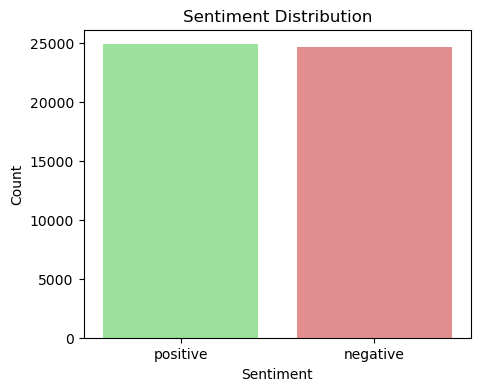

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x='sentiment',
    palette={'negative': 'lightcoral', 'positive': 'lightgreen'}  # lighter colors
)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


### 2. Review length distribution or character count

                                      lemmatized_str  char_count
0  one reviewer mentioned watching oz episode you...        1125
1  wonderful little production filming technique ...         640
2  thought wonderful way spend time hot summer we...         580
3  basically there family little boy jake think t...         446
4  petter matteis love time money visually stunni...         851


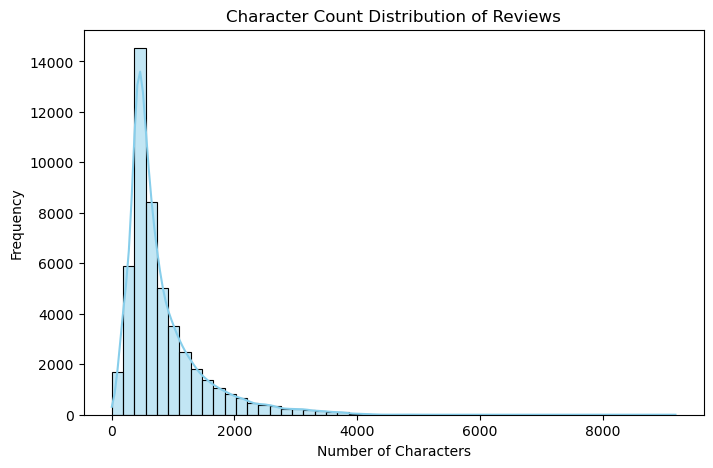

In [15]:
# Character count for each review
df['char_count'] = df['lemmatized_str'].apply(len)

# Display first few rows to check
print(df[['lemmatized_str', 'char_count']].head())

# plot character count distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['char_count'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title("Character Count Distribution of Reviews")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

### 3. Distribution of Average Word Length in Reviews

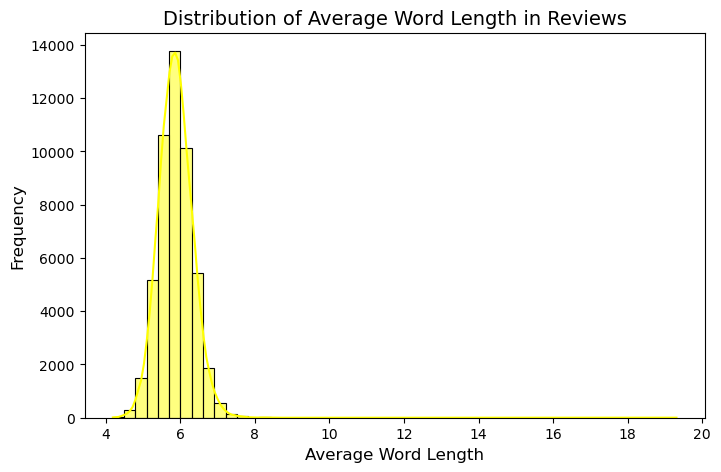

In [19]:
# Average word length per review
df['avg_word_length'] = df['lemmatized_str'].apply(lambda x: np.mean([len(word) for word in x.split()]))

plt.figure(figsize=(8,5))
sns.histplot(df['avg_word_length'], bins=50, kde=True, color='yellow', edgecolor='black')
plt.title("Distribution of Average Word Length in Reviews", fontsize=14)
plt.xlabel("Average Word Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()



### 3. Distribution of Word Count in IMDB Movie Reviews

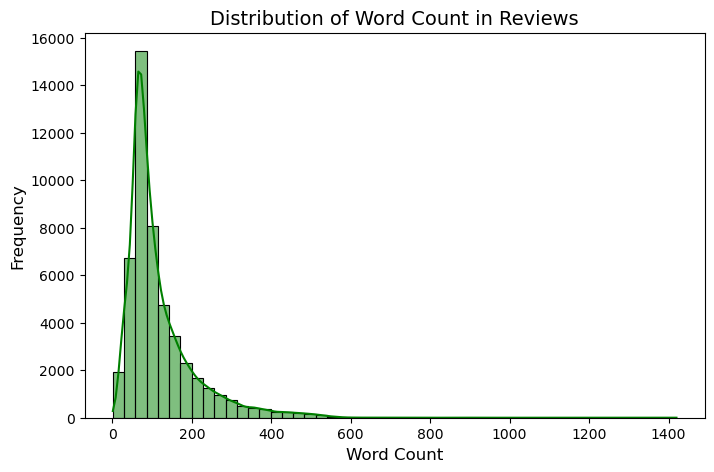

In [20]:
# Word count per review
df['word_count'] = df['lemmatized_str'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50, kde=True, color='green', edgecolor='black')
plt.title("Distribution of Word Count in Reviews", fontsize=14)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


### **Distribution of Textual Features in Reviews**

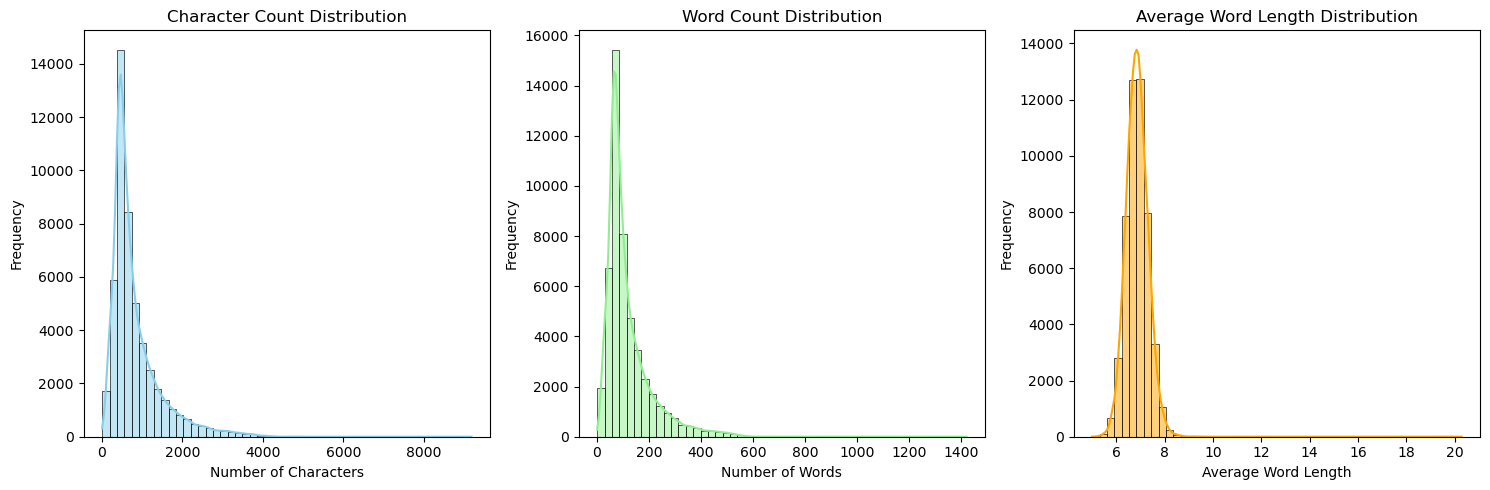

In [21]:
# Ensure we have features
df['char_count'] = df['lemmatized_str'].apply(len)
df['word_count'] = df['lemmatized_str'].apply(lambda x: len(x.split()))
df['avg_word_len'] = df['char_count'] / df['word_count']

# Create subplots
plt.figure(figsize=(15, 5))

# Character Count
plt.subplot(1, 3, 1)
sns.histplot(df['char_count'], bins=50, kde=True, color='skyblue')
plt.title("Character Count Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

# Word Count
plt.subplot(1, 3, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='lightgreen')
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

# Average Word Length
plt.subplot(1, 3, 3)
sns.histplot(df['avg_word_len'], bins=50, kde=True, color='orange')
plt.title("Average Word Length Distribution")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



### 4. WordCloud Visualization of Sentimen

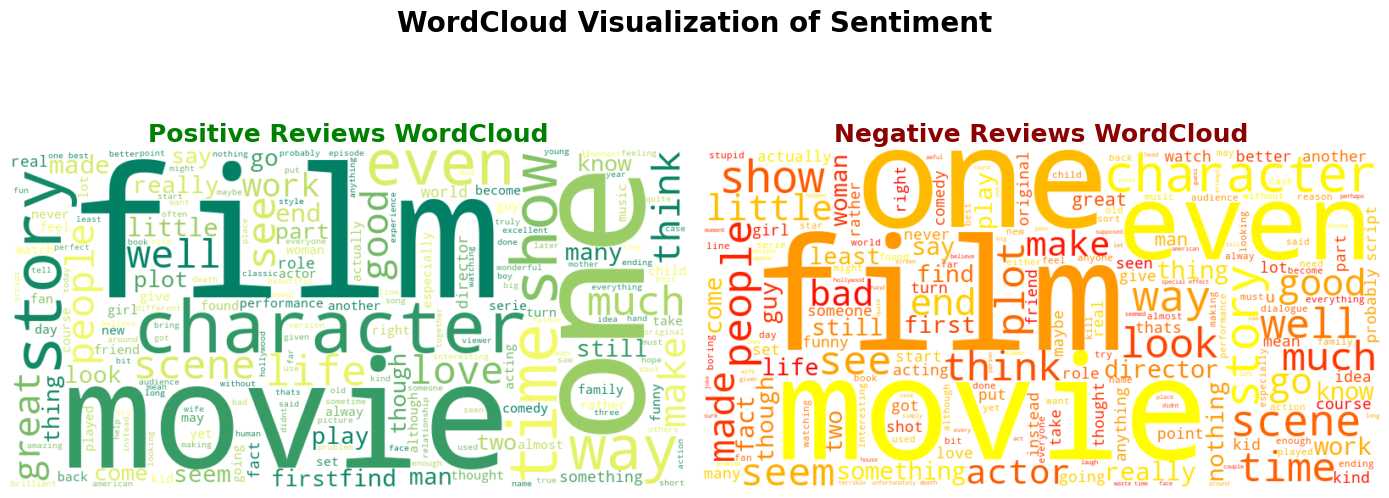

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_text = " ".join(df[df['sentiment'] == "positive"]['lemmatized_str'])
negative_text = " ".join(df[df['sentiment'] == "negative"]['lemmatized_str'])

# Create WordClouds with vibrant gradients
wc_positive = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='summer',  # green-yellow gradient
    contour_color='darkgreen', contour_width=2
).generate(positive_text)

wc_negative = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='autumn',  # red-orange gradient
    contour_color='darkred', contour_width=2
).generate(negative_text)

# Plot side-by-side
plt.figure(figsize=(14, 6))

# Positive reviews
plt.subplot(1, 2, 1)
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud', fontsize=18, fontweight='bold', color='green')

# Negative reviews
plt.subplot(1, 2, 2)
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud', fontsize=18, fontweight='bold', color='darkred')

plt.suptitle("WordCloud Visualization of Sentiment", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


## *3. Model Development*

## **Build and train classification models to predict the sentiment of reviews.**

## **Based on TF-IDF** 

* TF-IDF is preferred over Bag-of-Words because it not only counts word occurrences but also gives higher weight to words that are important for a document and lower weight to common words that appear in many documents.
This helps the model focus on more informative terms and often improves classification accuracy.

### 1. *Logistic Regression*
### 2. *Naive Bayes*
### 3. *Support Vector Machine (SVM)*
### 4. *Random Forest*
### 5. *MLP Classifier*
### 6. *XGB Classifier*

## **Based on Word2Vec, or embeddings** 
### 7. *MLP Neural Network Metrics*
### 8. *LSTM Neural Network Classifier*
### 9. *GRU Neural Network Metrics*

### **Train-Test Split for TF-IDF Features**

In [23]:
# ===== Train-Test Split for TF-IDF Features =====
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                 # TF-IDF features
    df['sentiment'],         # Target column
    test_size=0.2,           # 20% for testing
    random_state=42,         # For reproducibility
    stratify=df['sentiment'] # Keeps class distribution same in train & test
)


### 1. Logistic Regression

=== Logistic Regression with TF-IDF Features ===
Accuracy: 0.8850
Precision: 0.8786
Recall: 0.8945
F1-score: 0.8865
ROC-AUC: 0.9558

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4940
    positive       0.88      0.89      0.89      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



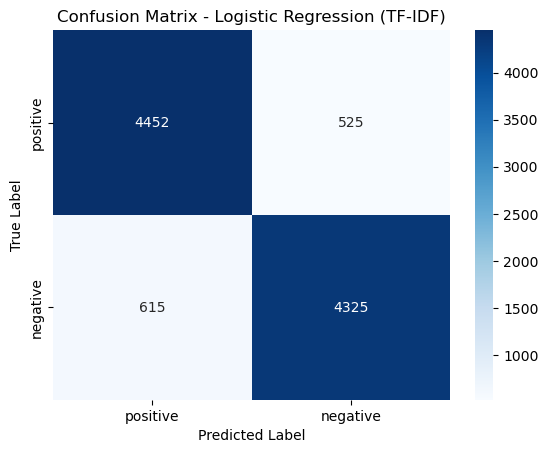

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
1  Logistic Regression  0.885046   0.878626  0.894515  0.886499  0.955835

In [24]:
# ===== Logistic Regression with TF-IDF Features =====
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train, y_train)

# Predictions
y_pred = lr_tfidf.predict(X_test)
y_proba = lr_tfidf.predict_proba(X_test)[:, 1]  # probability for positive class

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="positive")
recall = recall_score(y_test, y_pred, pos_label="positive")
f1 = f1_score(y_test, y_pred, pos_label="positive")
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_proba)

print("=== Logistic Regression with TF-IDF Features ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()

# Save result
result1=pd.DataFrame({"Model":"Logistic Regression","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[1])
result1

### 2. Naive Bayes

=== Naive Bayes (TF-IDF) ===
Accuracy: 0.8513
Precision: 0.8485
Recall: 0.8565
F1-score: 0.8525
ROC-AUC: 0.9279

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4940
    positive       0.85      0.86      0.85      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



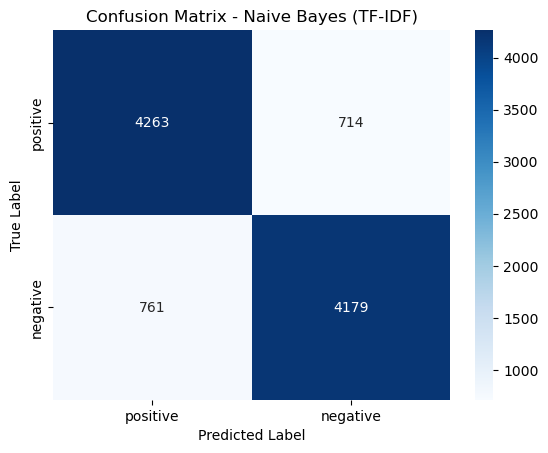

Model  Accuracy  Precision   Recall  F1-score   ROC-AUC
2  Naive Bayes  0.851266   0.848527  0.85654  0.852515  0.927887

In [25]:
# ===== Naive Bayes with TF-IDF Features =====

# Initialize and train model
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train, y_train)

# Predictions
y_pred = nb_tfidf.predict(X_test)
y_proba = nb_tfidf.predict_proba(X_test)[:, 1]  # Probability for positive class

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="positive")
recall = recall_score(y_test, y_pred, pos_label="positive")
f1 = f1_score(y_test, y_pred, pos_label="positive")
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_proba)

print("=== Naive Bayes (TF-IDF) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes (TF-IDF)")
plt.show()

# Save result
result2=pd.DataFrame({"Model":"Naive Bayes","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[2])
result2


### 3. Support Vector Machine (SVM)

=== Support Vector Machine (SVM) (TF-IDF) ===
Accuracy: 0.8772
Precision: 0.8758
Recall: 0.8800
F1-score: 0.8779
ROC-AUC: 0.9279

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.87      0.88      4940
    positive       0.88      0.88      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



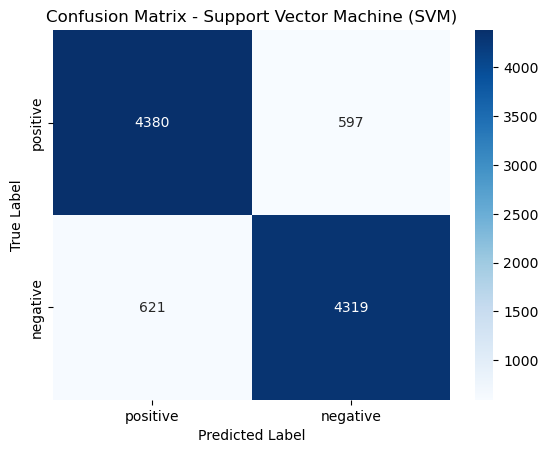

Model  Accuracy  Precision    Recall  F1-score  \
3  Support Vector Machine (SVM)  0.877181   0.875825  0.880048  0.877931   

    ROC-AUC  
3  0.927887

In [26]:
# Linear SVM (much faster)
svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train, y_train)

# Predictions
y_pred = svm_tfidf.predict(X_test)

# Since LinearSVC has no predict_proba, use decision_function for ROC-AUC
y_scores = svm_tfidf.decision_function(X_test)
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_scores)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="positive")
recall = recall_score(y_test, y_pred, pos_label="positive")
f1 = f1_score(y_test, y_pred, pos_label="positive")
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_proba)

print("=== Support Vector Machine (SVM) (TF-IDF) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.show()

# Save result
result3=pd.DataFrame({"Model":"Support Vector Machine (SVM)","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[3])
result3

### 4. Random Forest

=== Random Forest (TF-IDF) ===
Accuracy: 0.8451
Precision: 0.8467
Recall: 0.8443
F1-score: 0.8455
ROC-AUC: 0.9241

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.85      0.84      4940
    positive       0.85      0.84      0.85      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



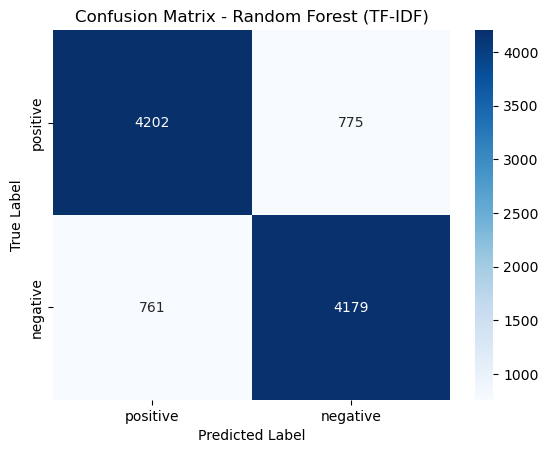

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
4  Random Forest  0.845114   0.846665  0.844284  0.845473  0.924124

In [27]:
# ===== Random Forest with TF-IDF Features =====

# Initialize and train model
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train, y_train)

# Predictions
y_pred = rf_tfidf.predict(X_test)
y_proba = rf_tfidf.predict_proba(X_test)[:, 1]  # Probability for positive class

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="positive")
recall = recall_score(y_test, y_pred, pos_label="positive")
f1 = f1_score(y_test, y_pred, pos_label="positive")
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_proba)

print("=== Random Forest (TF-IDF) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (TF-IDF)")
plt.show()

# Save result
result4=pd.DataFrame({"Model":"Random Forest","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[4])
result4

### 5. MLP Classifier

=== MLP Classifier (TF-IDF) ===
Accuracy: 0.8672
Precision: 0.8706
Recall: 0.8638
F1-score: 0.8672
ROC-AUC: 0.9414

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87      4940
    positive       0.87      0.86      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



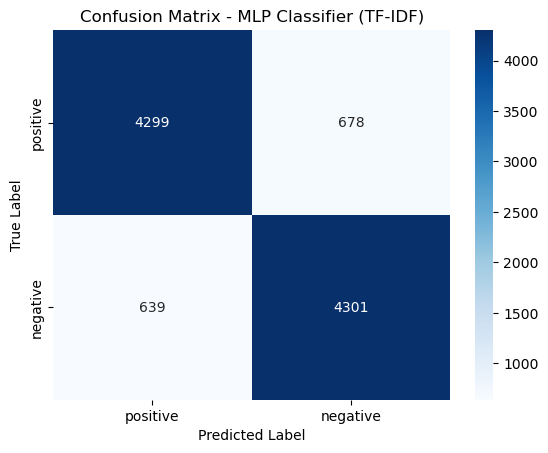

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
5  MLP Classifier  0.867198   0.870595  0.863773  0.867171  0.941416

In [28]:
# ===== MLP Classifier (Neural Network) with TF-IDF Features =====

# Initialize and train model
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)
mlp_tfidf.fit(X_train, y_train)

# Predictions
y_pred = mlp_tfidf.predict(X_test)
y_proba = mlp_tfidf.predict_proba(X_test)[:, 1]  # Probability for positive class

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="positive")
recall = recall_score(y_test, y_pred, pos_label="positive")
f1 = f1_score(y_test, y_pred, pos_label="positive")
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_proba)

print("=== MLP Classifier (TF-IDF) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MLP Classifier (TF-IDF)")
plt.show()

# Save result
result5=pd.DataFrame({"Model":"MLP Classifier","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[5])
result5

### 6. XGB Classifier

=== XGBoost (TF-IDF) ===
Accuracy: 0.8568
Precision: 0.8429
Recall: 0.8784
F1-score: 0.8603
ROC-AUC: 0.9357

Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.84      0.85      4940
    positive       0.84      0.88      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



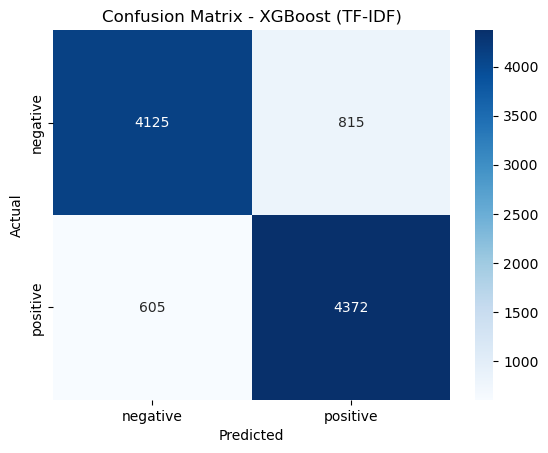

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
6  XGBoost  0.856812   0.842876  0.878441  0.860291  0.935724

In [29]:
# =====  XGB Classifier  =====

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # 'negative'->0, 'positive'->1
y_test_enc = le.transform(y_test)

# Initialize and train XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train_enc)

# Predictions (numeric)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Decode predictions back to original string labels
y_pred_labels = le.inverse_transform(y_pred)

# === Metrics (compare string vs string) ===
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, pos_label="positive")
recall = recall_score(y_test, y_pred_labels, pos_label="positive")
f1 = f1_score(y_test, y_pred_labels, pos_label="positive")
roc_auc = roc_auc_score((y_test == "positive").astype(int), y_proba)

print("=== XGBoost (TF-IDF) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

# Confusion Matrix (use encoded labels here)
cm = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (TF-IDF)")
plt.show()

# Save result
result6=pd.DataFrame({"Model":"XGBoost","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[6])
result6

## **Based on Word2Vec, or embeddings** 

### **Train-Test Split for Word2Vec, or embeddings**

In [30]:
from tensorflow.keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(df['sentiment'])  # replace 'sentiment' with your label column
y_enc = to_categorical(y_enc)  # one-hot encoding for neural network

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_word2vec,            # Word2Vec, or embeddings features
    y_enc,                 # Target column
    test_size=0.2,         # 20% for testing
    random_state=42        # For reproducibility
)      

### 7. MLP Neural Network Metrics

Epoch 1/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8316 - loss: 0.3806 - val_accuracy: 0.8588 - val_loss: 0.3284
Epoch 2/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8528 - loss: 0.3456 - val_accuracy: 0.8578 - val_loss: 0.3234
Epoch 3/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8574 - loss: 0.3372 - val_accuracy: 0.8629 - val_loss: 0.3214
Epoch 4/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8593 - loss: 0.3312 - val_accuracy: 0.8588 - val_loss: 0.3195
Epoch 5/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8590 - loss: 0.3303 - val_accuracy: 0.8624 - val_loss: 0.3186
Epoch 6/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8616 - loss: 0.3256 - val_accuracy: 0.8659 - val_loss: 0.3219
Epoch 7/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8617 - loss: 0.3241 - val_accuracy: 0.8644 - val_loss: 0.3137
Epoch 8/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8639 - loss: 0.3203 - 

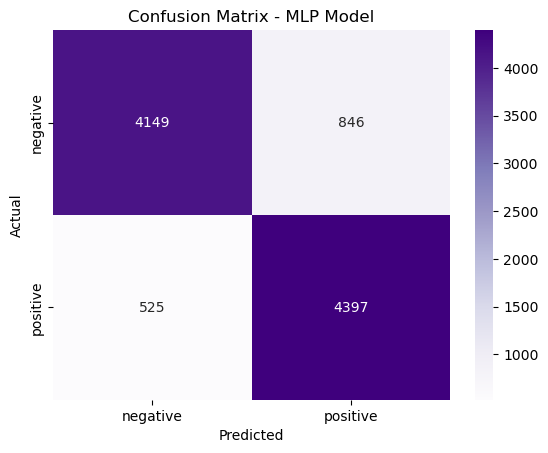

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
7  MLP Model  0.861753   0.838642  0.893336  0.865125  0.937383

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# =====  MLP Neural Network Classifier  =====

# Build MLP model
mlp = Sequential()
mlp.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(y_train.shape[1], activation='softmax'))  # output layer = num_classes

# Compile
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate
loss, test_accuracy = mlp.evaluate(X_test, y_test, verbose=0)
print("Raw Keras Test Accuracy:", test_accuracy)

# ===== Predictions =====
y_proba = mlp.predict(X_test)                  # probabilities
y_pred  = np.argmax(y_proba, axis=1)           # predicted class indices
y_true  = np.argmax(y_test, axis=1)            # true class indices

# Convert indices back to original string labels
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_true)

# ===== Metrics =====
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, pos_label="positive")
recall = recall_score(y_true_labels, y_pred_labels, pos_label="positive")
f1 = f1_score(y_true_labels, y_pred_labels, pos_label="positive")
roc_auc = roc_auc_score((y_true_labels == "positive").astype(int), y_proba[:, 1])

print("=== MLP Neural Network Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))

# ===== Confusion Matrix =====
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP Model")
plt.show()

# Save result
result7=pd.DataFrame({"Model":"MLP Model","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[7])
result7


### 8. LSTM Neural Network Classifier

Epoch 1/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8341 - loss: 0.3814 - val_accuracy: 0.8528 - val_loss: 0.3324
Epoch 2/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.3465 - val_accuracy: 0.8614 - val_loss: 0.3229
Epoch 3/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8577 - loss: 0.3373 - val_accuracy: 0.8583 - val_loss: 0.3200
Epoch 4/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8599 - loss: 0.3319 - val_accuracy: 0.8641 - val_loss: 0.3173
Epoch 5/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8610 - loss: 0.3289 - val_accuracy: 0.8586 - val_loss: 0.3212
Epoch 6/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8614 - loss: 0.3274 - val_accuracy: 0.8619 - val_loss: 0.3203
Epoch 7/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8633 - loss: 0.3218 - val_accuracy: 0.8634 - val_loss: 0.3148
Epoch 8/10
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8645 - loss: 0.3205 - 

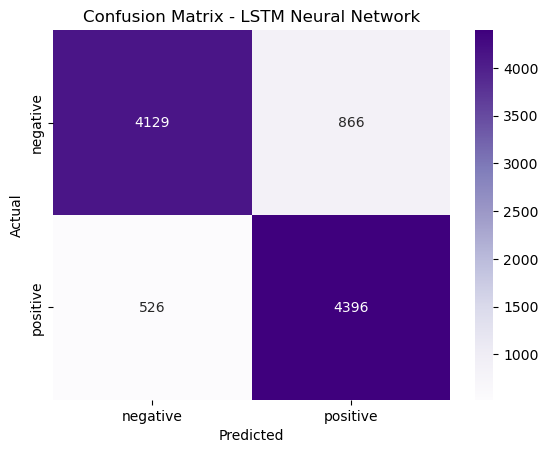

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
8  LSTM Neural Network  0.859635   0.835424  0.893133  0.863315  0.937526

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# =====  MLP Neural Network Classifier  =====

# Build MLP model
mlp = Sequential()
mlp.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(y_train.shape[1], activation='softmax'))  # output layer

# Compile
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predictions
y_pred_prob = mlp.predict(X_test)                     # probability scores
y_pred = np.argmax(y_pred_prob, axis=1)               # predicted class indices
y_true = np.argmax(y_test, axis=1)                    # true class indices

# Convert back to string labels
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_true)

# ===== Metrics =====
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, pos_label="positive")
recall = recall_score(y_true_labels, y_pred_labels, pos_label="positive")
f1 = f1_score(y_true_labels, y_pred_labels, pos_label="positive")
roc_auc = roc_auc_score((y_true_labels == "positive").astype(int), y_pred_prob[:, 1])

print("===LSTM Neural Network ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM Neural Network")
plt.show()

# Save result
result8=pd.DataFrame({"Model":"LSTM Neural Network","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[8])
result8


### 9. GRU Neural Network Metrics

Epoch 1/5
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 104s 89ms/step - accuracy: 0.8130 - loss: 0.4118 - val_accuracy: 0.8687 - val_loss: 0.3090
Epoch 2/5
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 104s 93ms/step - accuracy: 0.8913 - loss: 0.2697 - val_accuracy: 0.8843 - val_loss: 0.2839
Epoch 3/5
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 102s 91ms/step - accuracy: 0.9139 - loss: 0.2144 - val_accuracy: 0.8712 - val_loss: 0.3188
Epoch 4/5
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 105s 94ms/step - accuracy: 0.9350 - loss: 0.1734 - val_accuracy: 0.8674 - val_loss: 0.3408
Epoch 5/5
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 118s 105ms/step - accuracy: 0.9490 - loss: 0.1350 - val_accuracy: 0.8616 - val_loss: 0.3741
310/310 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step
=== GRU Neural Network ===
Accuracy: 0.8637
Precision: 0.8630
Recall: 0.8623
F1-score: 0.8626
ROC-AUC: 0.9364

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4995
    positive       0.86      0.86      0.86      4922

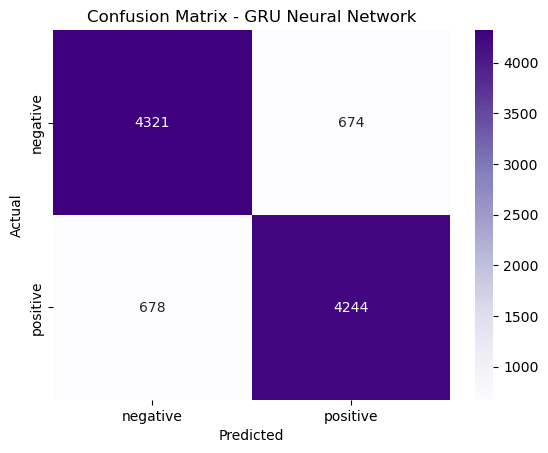

Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
9  GRU Neural Network   0.863668   0.862952  0.862251  0.862602  0.936355

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === GRU Neural Network Classifier ===

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['lemmatized_str'])
sequences = tokenizer.texts_to_sequences(df['lemmatized_str'])
X_seq = pad_sequences(sequences, maxlen=max_len)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_enc, test_size=0.2, random_state=42)

# Build GRU model
gru = Sequential()
gru.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
gru.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
gru.add(Dense(y_enc.shape[1], activation='softmax'))

# Compile
gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = gru.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

# Predictions
y_pred_prob = gru.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Convert back to string labels
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_true)

# Metrics
print("=== GRU Neural Network ===")
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, pos_label="positive")
recall = recall_score(y_true_labels, y_pred_labels, pos_label="positive")
f1 = f1_score(y_true_labels, y_pred_labels, pos_label="positive")
roc_auc = roc_auc_score((y_true_labels == "positive").astype(int), y_pred_prob[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GRU Neural Network")
plt.show()

# Save result
result9=pd.DataFrame({"Model":"GRU Neural Network ","Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1-score":f1,"ROC-AUC":roc_auc},index=[9])
result9

## *4. Model Evaluation*

In [34]:
## Evaluate the model’s performance using appropriate metrics:

eval_table = pd.concat([result1, result2, result3, result4, result5, result6, result7, result8, result9])
final_result = eval_table.sort_values(by=['F1-score','ROC-AUC'], ascending=False)
final_result

Model  Accuracy  Precision    Recall  F1-score  \
1           Logistic Regression  0.885046   0.878626  0.894515  0.886499   
3  Support Vector Machine (SVM)  0.877181   0.875825  0.880048  0.877931   
5                MLP Classifier  0.867198   0.870595  0.863773  0.867171   
7                     MLP Model  0.861753   0.838642  0.893336  0.865125   
8           LSTM Neural Network  0.859635   0.835424  0.893133  0.863315   
9           GRU Neural Network   0.863668   0.862952  0.862251  0.862602   
6                       XGBoost  0.856812   0.842876  0.878441  0.860291   
2                   Naive Bayes  0.851266   0.848527  0.856540  0.852515   
4                 Random Forest  0.845114   0.846665  0.844284  0.845473   

    ROC-AUC  
1  0.955835  
3  0.927887  
5  0.941416  
7  0.937383  
8  0.937526  
9  0.936355  
6  0.935724  
2  0.927887  
4  0.924124

## Top Performing Models :

**Logistic Regression is our best model overall.**

* F1-score = 0.8865 (highest of all).

* ROC-AUC = 0.9558 (also highest → excellent ability to separate classes).

* Balanced performance: high precision and recall.

* Support Vector Machine (SVM) is the second-best model.

* F1-score = 0.8779, ROC-AUC = 0.9279.

***Very close to Logistic Regression, but slightly weaker in ROC-AUC.***

## **Prediction on New, Unseen Data :**

* Using the best-performing model (Logistic Regression with TF-IDF), we can transform any new movie reviews into TF-IDF features and predict its Sentiment.
* This ensures the model generalizes well and provides reliable results for real-world text classification tasks.

In [42]:
# ===== Predictions for New Movie Reviews =====
new_reviews = [
    "The movie was absolutely fantastic, I loved it!",
    "It was a total waste of time, very boring.",
    "Decent film, but the acting could have been better."
]

# Transform the new reviews using the SAME fitted TF-IDF vectorizer
new_reviews_tfidf = tfidf_vectorizer.transform(new_reviews)

# Predict sentiment
new_preds = lr_tfidf.predict(new_reviews_tfidf)
new_proba = lr_tfidf.predict_proba(new_reviews_tfidf)[:, 1]  # probability for positive class

# Display results
print("\n=== Predictions for New Reviews ===")
for review, pred, prob in zip(new_reviews, new_preds, new_proba):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {pred}")
    print("-" * 60)



=== Predictions for New Reviews ===
Review: The movie was absolutely fantastic, I loved it!
Predicted Sentiment: positive
------------------------------------------------------------
Review: It was a total waste of time, very boring.
Predicted Sentiment: negative
------------------------------------------------------------
Review: Decent film, but the acting could have been better.
Predicted Sentiment: negative
------------------------------------------------------------


## *5. Final Report and Presentation :*

## **Create a final report :**

### **Introduction :** The primary objective of this project is to build a machine learning classification model that can predict the sentiment of IMDb movie reviews.The project will aim to develop a model that can effectively classify the sentiment of movie reviews. The model's performance will be evaluated using standard classification metrics, such as accuracy, precision, recall, and F1-score.

## **1. Data Exploration and Preprocessing :**

## **Steps:**
### Loaded dataset:

In [36]:
df.head()

review sentiment  review_length  \
0  One of the other reviewers has mentioned that ...  positive            307   
1  A wonderful little production. <br /><br />The...  positive            162   
2  I thought this was a wonderful way to spend ti...  positive            166   
3  Basically there's a family where a little boy ...  negative            138   
4  Petter Mattei's "Love in the Time of Money" is...  positive            230   

                                        clean_review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                              tokens  \
0  [one, reviewers, mentioned, watching, oz, epis...   
1  [wonderful, little, production, filming, techn...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, theres, family, little, boy, jake,...   
4  [petter, matteis, love, time, money, visually,...   

                                          lemmatized  \
0  [one, reviewer, mentioned, watching, oz, episo...   
1  [wonderful, little, production, filming, techn...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, there, family, little, boy, jake, ...   
4  [petter, matteis, love, time, money, visually,...   

                                      lemmatized_str  char_count  \
0  one reviewer mentioned watching oz episode you...        1125   
1  wonderful little production filming technique ...         640   
2  thought wonderful way spend time hot summer we...         580   
3  basically there family little boy jake think t...         446   
4  petter matteis love time money visually stunni...         851   

   avg_word_length  word_count  avg_word_len  
0         5.742515         167      6.736527  
1         6.630952          84      7.619048  
2         5.835294          85      6.823529  
3         5.772727          66      6.757576  
4         5.816000         125      6.808000

### Basic inspection (Shape,null and duplicate):treatment on duplicate rows.

In [37]:
df.shape   # after removing duplicate rows

(49581, 11)

### Checked for missing values and handled them.

In [38]:
## Any missing values in dataset
print("Any missing values in dataset?:", df.isnull().values.any())

## Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

## Total missing values in entire dataset
print("\nTotal missing values in entire dataset:")
print(df.isnull().sum().sum())

Any missing values in dataset?: False

Missing values per column:
review             0
sentiment          0
review_length      0
clean_review       0
tokens             0
lemmatized         0
lemmatized_str     0
char_count         0
avg_word_length    0
word_count         0
avg_word_len       0
dtype: int64

Total missing values in entire dataset:
0


### Compute review lengths (word count) and Number of reviews per sentiment:

In [39]:
# Compute review lengths (word count)
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
print("\nReview length stats:\n", df['review_length'].describe())

# Number of reviews per sentiment
df['sentiment'].value_counts()


Review length stats:
 count    49581.000000
mean       231.344366
std        171.546644
min          1.000000
25%        126.000000
50%        173.000000
75%        281.000000
max       2470.000000
Name: review_length, dtype: float64


sentiment
positive    24884
negative    24697
Name: count, dtype: int64

### Perform data cleaning and text preprocessing

**After Removing stop words, punctuation, and special characters.**

▪ Tokenization of text (splitting text into words).

▪ Lemmatization and stemming.

In [40]:
df.lemmatized.head()

0    [one, reviewer, mentioned, watching, oz, episo...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, family, little, boy, jake, ...
4    [petter, matteis, love, time, money, visually,...
Name: lemmatized, dtype: object

## **2. Feature Engineering**

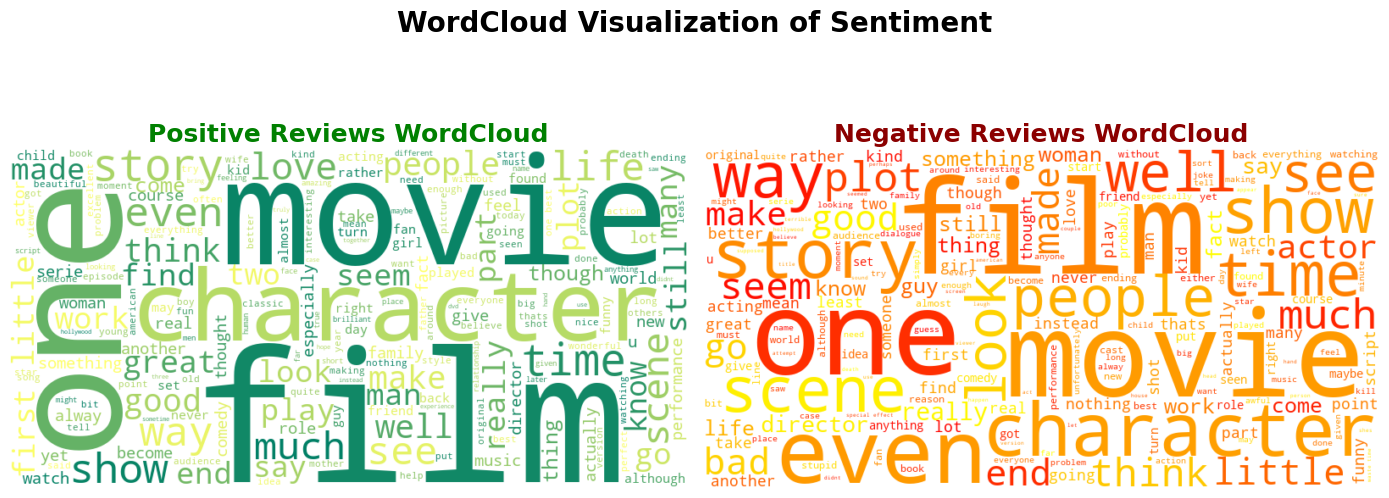

**1. Positive Reviews WordCloud (Left, Green Shades)**

* Words like “movie”, “film”, “love”, “great”, “good”, “play”, “show” appear larger.

* Large size = frequent in positive reviews.

**Interpretation:** Positive reviewers frequently use words related to enjoyment, quality, and acting.
 Words like “story”, “life”, “time”, “actor” indicate discussions about plot and performance, mostly in a positive context.

**2. Negative Reviews WordCloud (Right, Red-Orange Shades)**

* Words like “movie”, “film”, “one”, “character”, “scene”, “even”, “time”, “people” appear large.

* Words like “plot”, “bad”, “end”, “think”, “little” indicate criticism.

**Interpretation:** Negative reviewers focus on weak points of movies, such as story, characters, and plot, often highlighting dissatisfaction.

## **3. Model Development**

## **Based on TF-IDF** 
### 1. *Logistic Regression*
### 2. *Naive Bayes*
### 3. *Support Vector Machine (SVM)*
### 4. *Random Forest*
### 5. *MLP Classifier*
### 6. *XGB Classifier*
## **Based on Word2Vec, or embeddings** 
### 7. *MLP Neural Network Metrics*
### 8. *LSTM Neural Network Classifier*
### 9. *GRU Neural Network Metrics*

## **4. Model Evaluation**

In [41]:
final_result

Model  Accuracy  Precision    Recall  F1-score  \
1           Logistic Regression  0.885046   0.878626  0.894515  0.886499   
3  Support Vector Machine (SVM)  0.877181   0.875825  0.880048  0.877931   
5                MLP Classifier  0.867198   0.870595  0.863773  0.867171   
7                     MLP Model  0.861753   0.838642  0.893336  0.865125   
8           LSTM Neural Network  0.859635   0.835424  0.893133  0.863315   
9           GRU Neural Network   0.863668   0.862952  0.862251  0.862602   
6                       XGBoost  0.856812   0.842876  0.878441  0.860291   
2                   Naive Bayes  0.851266   0.848527  0.856540  0.852515   
4                 Random Forest  0.845114   0.846665  0.844284  0.845473   

    ROC-AUC  
1  0.955835  
3  0.927887  
5  0.941416  
7  0.937383  
8  0.937526  
9  0.936355  
6  0.935724  
2  0.927887  
4  0.924124

## Top Performing Models :

**Logistic Regression is our best model overall.**

* F1-score = 0.8865 (highest of all).

* ROC-AUC = 0.9558 (also highest → excellent ability to separate classes).

* Balanced performance: high precision and recall.

* Support Vector Machine (SVM) is the second-best model.

* F1-score = 0.8779, ROC-AUC = 0.9279.

***Very close to Logistic Regression, but slightly weaker in ROC-AUC.***

# ***Thank You***